In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv("Hyderabad.csv")
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


**Data Summary**

In [3]:
display(df.describe([.25,.50, 0.75, 0.99]).T)

,count,mean,std,min,25%,50%,75%,99%,max
Price,2518.0,9.818380e+06,8.777113e+06,2000000.0,4760000.0,7754000.0,10900000.0,45000000.0,165000000.0
Area,2518.0,1.644571e+03,7.462570e+02,500.0,1160.0,1500.0,1829.0,4500.0,9400.0
No. of Bedrooms,2518.0,2.623511e+00,6.873302e-01,1.0,2.0,3.0,3.0,4.0,8.0
Resale,2518.0,2.275616e-01,4.193413e-01,0.0,0.0,0.0,0.0,1.0,1.0
MaintenanceStaff,2518.0,4.126291e-01,1.626445e+00,0.0,0.0,0.0,0.0,9.0,9.0
Gymnasium,2518.0,7.398729e-01,1.611024e+00,0.0,0.0,0.0,1.0,9.0,9.0
SwimmingPool,2518.0,7.096902e-01,1.615231e+00,0.0,0.0,0.0,1.0,9.0,9.0
LandscapedGardens,2518.0,6.191422e-01,1.624426e+00,0.0,0.0,0.0,1.0,9.0,9.0
JoggingTrack,2518.0,5.599682e-01,1.627686e+00,0.0,0.0,0.0,1.0,9.0,9.0
RainWaterHarvesting,2518.0,6.064337e-01,1.625308e+00,0.0,0.0,0.0,1.0,9.0,9.0


- We can notice that there are some outliers and also feature scaling is needed.

**Data Info**

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

None

## Split 20% of data for final testing

In [157]:
df, test_df = train_test_split(df, test_size=0.2 , random_state=42)
display(df.shape)

(1110, 8)

**-->** 504 observations where separated for final testing and 2014 to be used in training and validation

## Data Exploration and Cleaning

### Checking for Null values

In [6]:
df.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


- There are no missing values

### Checking for duplicates

In [7]:
print("Number of duplicate rows:", df.duplicated(subset=None, keep='first').sum())

Number of duplicate rows: 384


- There are 384 duplicate rows in the dataset, we will drop them.

**Drop duplicates**

In [8]:
df.drop_duplicates(subset=None, keep='first',inplace=True)

### Count plot of all amenities features

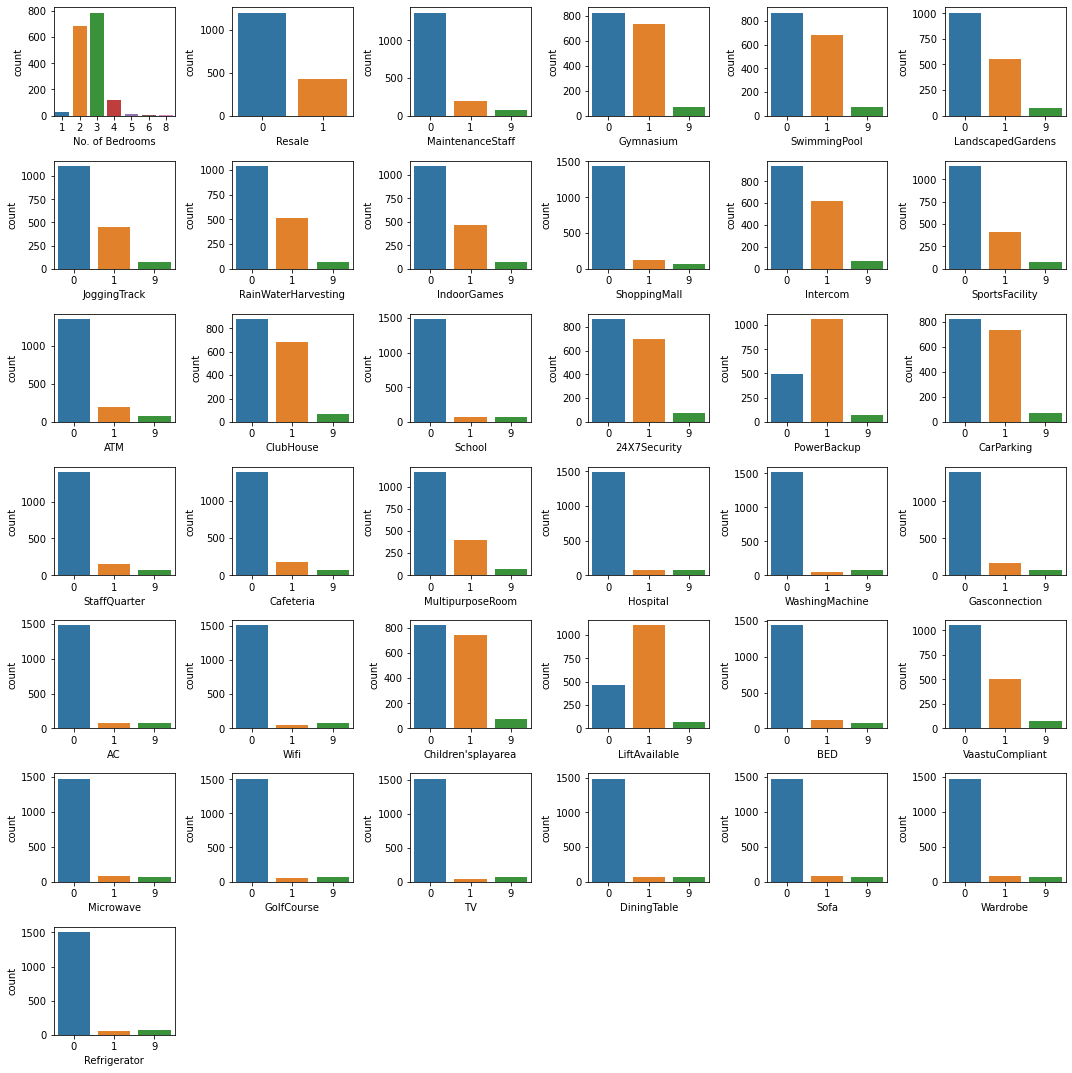

In [9]:
amenities_cols = df.drop(columns=['Location', 'Price', 'Area']).columns

plt.figure(figsize=(15, 15))
for n, variable in enumerate(amenities_cols):
    ax = plt.subplot(7, 6, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax)
plt.tight_layout()

- The records with values of 9 seems to be inaccurate, so we will invistegate rows that have any feature with values of 9:

In [10]:
df.loc[df['Gymnasium'] == 9]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
2460,9991000,1045,Dilsukh Nagar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2503,3500000,1050,Nacharam,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2482,12500000,2225,Kondapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2436,6277000,1435,Kukatpally,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2509,3800000,1260,Nacharam,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,3000000,2300,Manikonda,4,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2455,6240000,1655,Kollur Road,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2472,3650000,1460,Narsingi,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2449,4200000,1665,Kollur Road,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


- Any row with 9 value is any features have 9 in all features, which assures that these rows are totally inaccurate and have no meaning, so we **will drop them**.

#### Dropping rows with values of 9 in all columns 

In [11]:
df.drop(df[(df['Gymnasium']==9) & (df['SwimmingPool']==9) & (df['LandscapedGardens']==9)].index, inplace = True)

### Box plot of all amenities features

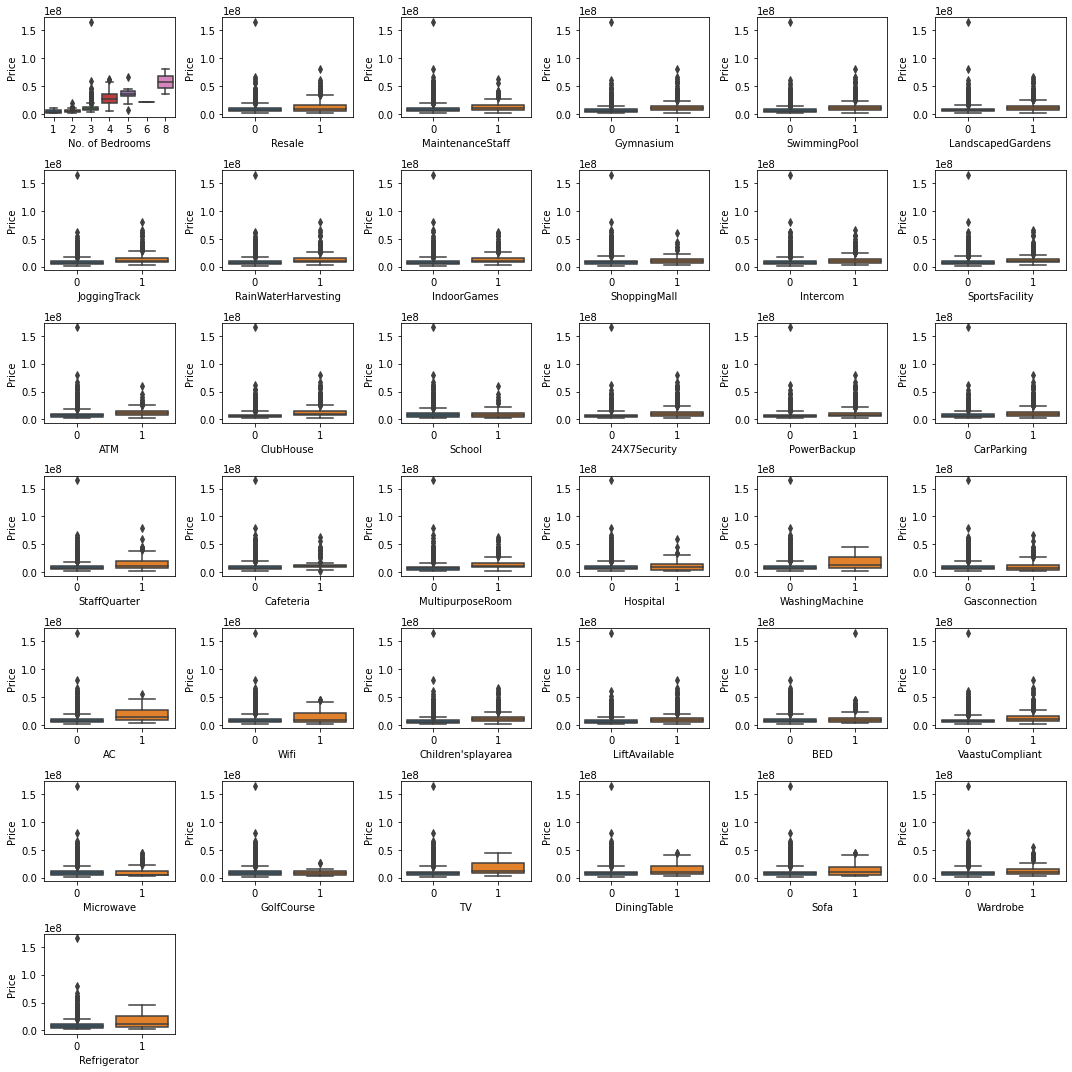

In [12]:
plt.figure(figsize=(15, 15))
for n, variable in enumerate(amenities_cols):
    ax = plt.subplot(7, 6, n + 1)
    g=sns.boxplot(data=df, x=df[variable],y= df['Price'], ax=ax)
plt.tight_layout()

### Histogram and Boxplot of continous features

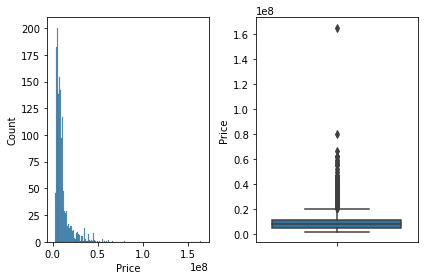

In [13]:
plt.subplot(1, 2, 1)
_ = sns.histplot(x='Price', data=df)

plt.subplot(1, 2, 2)
_ = sns.boxplot(y='Price', data=df)
plt.tight_layout()

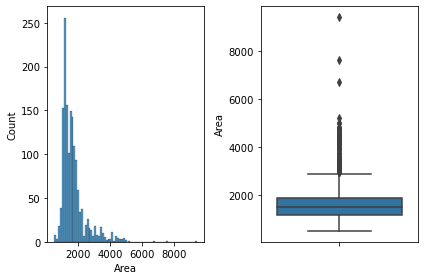

In [14]:
plt.subplot(1, 2, 1)
_ = sns.histplot(x='Area', data=df)

plt.subplot(1, 2, 2)
_ = sns.boxplot(y='Area', data=df)
plt.tight_layout()

- There are some outliers and the data are right skewed.

## Feature engineering
We added two features:\
1- Extracting longitude & latitude features from Location\
2- Combining all amenities in one feature called 'Luxury' that refers to luxury degree where:
- If ALL the luxury features are **absent** --> assign 0
- If ANY of the **indoor** luxury features are available --> assign 1
- If ANY of the **outdoor** luxury features are available --> assign 2
- If ALL of the **indoor & outdoor** luxury features are available --> assign 3
- Finally, drop amenities columns and keep the Luxury column only.

For simplicity, feature_eng() function is created to combine any feature engineering steps and to be applied directly on the training and testing sets.

In [15]:
# get location code function
location=Nominatim(user_agent="http")
def get_location_code(x):
    try:
        cordinates=location.geocode(x, country_codes='INR')
        return cordinates.latitude, cordinates.longitude  
    except:
        return "Not found", "Not found"
    
def feature_eng(df):
    #Extracting longitude & latitude features from Location
    unique_location= df['Location'].unique()
    location_to_code={}
    for place in unique_location:
        location_to_code[place]=get_location_code(place)         
    df['Latitude'], df['Longitude']=zip(*df['Location'].map(location_to_code))
    df= df[df['Latitude'] != 'Not found'].reset_index(drop=True)
    
    ## Combining all amenities in one feature called 'Luxury' feature
    #If ALL the luxury features are absent --> assign 0
    df.loc[(df["WashingMachine"]==0)&(df["Gasconnection"]==0)&(df["AC"]==0)&(df["Wifi"]==0)&(df["Children'splayarea"]==0)&
       (df["LiftAvailable"]==0)&(df["BED"]==0)&(df["Microwave"]==0)&(df['TV']==0)&(df['DiningTable']==0)&(df["Sofa"]==0)&
       (df["Wardrobe"]==0)&(df["Refrigerator"]==0)&(df["VaastuCompliant"]==0)&(df["SwimmingPool"]==0)&
       (df["LandscapedGardens"]==0)&(df["Gymnasium"]==0)&(df["JoggingTrack"]==0)&(df["CarParking"]==0)&
       (df["MaintenanceStaff"]==0)&(df["GolfCourse"]==0)&(df["RainWaterHarvesting"]==0)&(df["IndoorGames"]==0)&
       (df["ShoppingMall"]==0)&(df["Intercom"]==0)&(df["SportsFacility"]==0)&(df["ATM"]==0)&(df["ClubHouse"]==0)&
       (df["School"]==0)&(df["24X7Security"]==0)&(df["PowerBackup"]==0)&(df["StaffQuarter"]==0)&(df["Cafeteria"]==0)&
       (df["MultipurposeRoom"]==0)&(df["Hospital"]==0),"luxury"] = 0
    
    #If ANY of the indoor luxury features are available --> assign 1
    df.loc[(df["WashingMachine"]==1)|(df["Gasconnection"]==1)|(df["AC"]==1)|(df["Wifi"]==1)|
       (df["LiftAvailable"]==1)|(df["BED"]==1)|(df["Microwave"]==1)|(df['TV']==1)|(df['DiningTable']==1)|(df["Sofa"]==1)|
       (df["Wardrobe"]==1)|(df["Refrigerator"]==1)|(df["MultipurposeRoom"]==1),"luxury"] = 1
    
    #If ANY of the outdoor luxury features are available --> assign 2
    df.loc[(df["VaastuCompliant"]==1)|(df["SwimmingPool"]==1)|(df["LandscapedGardens"]==1)|(df["Gymnasium"]==1)|
       (df["JoggingTrack"]==1)|(df["CarParking"]==1)|(df["MaintenanceStaff"]==1)|(df["GolfCourse"]==1)|
       (df["RainWaterHarvesting"]==1)|(df["IndoorGames"]==1)|(df["ShoppingMall"]==1)|(df["Intercom"]==1)|
       (df["SportsFacility"]==1)|(df["ATM"]==1)|(df["ClubHouse"]==1)|(df["School"]==1)|(df["24X7Security"]==1)|
       (df["PowerBackup"]==1)|(df["StaffQuarter"]==1)|(df["Cafeteria"]==1)|(df["Hospital"]==1)|
       (df["Children'splayarea"]==1),"luxury"] = 2
    
    #If ALL of the indoor & outdoor luxury features are available --> assign 3
    df.loc[(df["WashingMachine"]==1)&(df["Gasconnection"]==1)&(df["AC"]==1)&(df["Wifi"]==1)&(df["Children'splayarea"]==1)&
       (df["LiftAvailable"]==1)&(df["BED"]==1)&(df["Microwave"]==1)&(df['TV']==1)&(df['DiningTable']==1)&(df["Sofa"]==1)&
       (df["Wardrobe"]==1)&(df["Refrigerator"]==1)&(df["VaastuCompliant"]==1)&(df["SwimmingPool"]==1)&
       (df["LandscapedGardens"]==1)&(df["Gymnasium"]==1)&(df["JoggingTrack"]==1)&(df["CarParking"]==1)&
       (df["MaintenanceStaff"]==1)&(df["GolfCourse"]==1)&(df["RainWaterHarvesting"]==1)&(df["IndoorGames"]==1)&
       (df["ShoppingMall"]==1)&(df["Intercom"]==1)&(df["SportsFacility"]==1)&(df["ATM"]==1)&(df["ClubHouse"]==1)&
       (df["School"]==1)&(df["24X7Security"]==1)&(df["PowerBackup"]==1)&(df["StaffQuarter"]==1)&(df["Cafeteria"]==1)&
       (df["MultipurposeRoom"]==1)&(df["Hospital"]==1),"luxury"] = 3
    
    #Dropping amenities features
    df.drop(df.iloc[:, 5:-3], inplace=True, axis=1)
    return(df)

**Apply to Training set**

In [16]:
df = feature_eng(df)

## Data Preprocessing

#### 1- Removing outliers in continous features

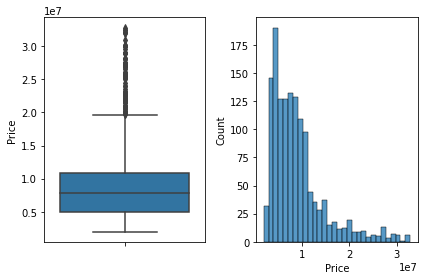

In [17]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1    
filter_price = (df['Price'] >= Q1 - 3.5*IQR) & (df['Price'] <= Q3 + 3.5*IQR)
df = df.loc[filter_price] 

### plot boxplot and histogram after removing outliers above and below 3.5 IQR
plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Price', data= df)
plt.subplot(1, 2, 2)
_ = sns.histplot(x='Price', data= df)
plt.tight_layout()

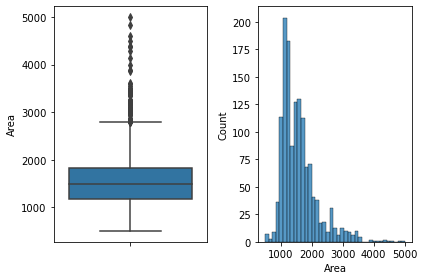

In [18]:
# Drop observations greater than some value
df = df[df['Area'] <= 6000]

### plot boxplot and histogram after removing outliers
plt.subplot(1, 2, 1)
_ = sns.boxplot(y='Area', data= df)
plt.subplot(1, 2, 2)
_ = sns.histplot(x='Area', data= df)
plt.tight_layout()

#### 2- Catboost Encoder for 'Location' feature

In [19]:
CBE_encoder = CatBoostEncoder()
df["Location"] = CBE_encoder.fit_transform(df["Location"], df['Price'])

#### 3- Feature Scaling

- Apply log to 'Area' for scaling and overcoming the Sckewness

In [20]:
df['Area'] = np.log1p(df['Area'])

- Apply log to 'Price' for same reason, plus to **avoid negative predicted values**

In [21]:
df['Price'] = np.log1p(df['Price'])

- Standard scale "Location", "Latitude" & "Longitude" features

In [22]:
sc = StandardScaler()
df[["Location","Latitude","Longitude"]]= sc.fit_transform(df[["Location","Latitude","Longitude"]])

In [23]:
df

,Price,Area,Location,No. of Bedrooms,Resale,Latitude,Longitude,luxury
0,16.195057,7.682943,-0.062195,3,0,0.046492,0.115500,2.0
1,16.118096,7.167038,-0.062195,2,0,0.130217,0.216419,2.0
2,16.951005,7.625595,-0.062195,4,0,-0.105887,0.132562,2.0
3,16.523561,7.586296,-0.062195,3,1,-0.105971,0.139070,0.0
4,16.300417,7.313887,-0.062195,3,0,-0.105689,0.135943,2.0
...,...,...,...,...,...,...,...,...
1442,16.056220,7.215975,0.198045,2,0,-0.094729,0.133807,2.0
1443,15.384127,6.809039,-0.937238,2,0,-0.133099,0.141739,1.0
1444,15.702580,7.230563,-0.291909,3,0,-0.374795,0.266029,0.0
1445,15.955577,7.601402,-0.298399,3,0,-0.374795,0.266029,2.0


## Model Training with Cross-Validation

In [24]:
X = df.drop(['Price'], axis='columns')
y = df['Price']

### Linear Regression

In [25]:
linear_model = LinearRegression()
errors = cross_val_score(linear_model, X, y, cv=10)
print(errors)
print(errors.mean())

[0.78696247 0.8450753  0.7736477  0.79121904 0.80959251 0.86142294
 0.8252601  0.83847692 0.84466099 0.7655712 ]
0.8141889167272399


In [26]:
linear_model.fit(X, y)

pred_train = linear_model.predict(X)
print('RMSE train: ', np.sqrt(metrics.mean_squared_error(y, pred_train)))
print("LR train score: ", r2_score(y, pred_train),'\n')

RMSE train:  0.23393647055895772
LR train score:  0.8194602989706077 



### Polynomial Regression

In [27]:
poly_feat = PolynomialFeatures(degree= 2)
X_poly = poly_feat.fit_transform(X)
poly_model = LinearRegression()

errors_poly = cross_val_score(poly_model, X_poly, y, cv=10)
print(errors_poly)
print(errors_poly.mean())

[0.68212886 0.8637568  0.78858298 0.80172011 0.81354554 0.86894921
 0.81972773 0.82831947 0.83558116 0.78328237]
0.808559423054582


In [28]:
poly_model.fit(X_poly, y)

pred_train = poly_model.predict(X_poly)
print('Poly reg RMSE train: ', np.sqrt(metrics.mean_squared_error(y, pred_train)))
print("Poly reg train score: ", r2_score(y, pred_train),'\n')

Poly reg RMSE train:  0.22534449713341817
Poly reg train score:  0.8324784176443544 



- **Try higher degrees then apply regularization**

In [138]:
poly_high_deg = PolynomialFeatures(degree= 4)
X_high_deg = poly_high_deg.fit_transform(X)
poly_high_deg_model = LinearRegression()

errors_poly = cross_val_score(poly_high_deg_model, X_high_deg, y, cv=10)
print(errors_poly)
print(errors_poly.mean())

[-1.61379057e+05 -6.01147040e+02 -3.99971623e+06 -3.02411973e+04
 -3.48338100e+05 -5.68415191e+06 -4.99317135e+05 -5.15355965e+06
 -1.12773607e+04 -4.20654684e+06]
-2009512.8628649847


--> Complete overfitting here

In [139]:
poly_high_deg_model.fit(X_high_deg, y)

pred_train = poly_high_deg_model.predict(X_high_deg)
print('Poly reg RMSE train: ', np.sqrt(metrics.mean_squared_error(y, pred_train)))
print("Poly reg train score: ", r2_score(y, pred_train),'\n')

Poly reg RMSE train:  0.18780359044108594
Poly reg train score:  0.8836451115841528 



### Apply Regularization

- 1- Trying Lasso regularization

In [153]:
lasso_model = Lasso(alpha=0.01)

errors_reg_L1 = cross_val_score(lasso_model, X_high_deg, y, cv=10)
print(errors_reg_L1)
print(errors_reg_L1.mean())

[0.71909214 0.84852959 0.76433293 0.79287462 0.80346816 0.86920221
 0.82096967 0.79737871 0.8429866  0.7610448 ]
0.8019879406226934


In [154]:
lasso_model.fit(X_high_deg, y)

pred_train_L1 = lasso_model.predict(X_high_deg)
print('RMSE train poly: ', np.sqrt(metrics.mean_squared_error(y, pred_train_L1)))
print("Poly reg train score: ", r2_score(y, pred_train_L1),'\n')

RMSE train poly:  0.22340819813070958
Poly reg train score:  0.8353449466724738 



- 2- Trying Ridge regularization

In [232]:
ridge_model = Ridge(alpha=1000000, max_iter=2000)

errors_reg_L2 = cross_val_score(ridge_model, X_high_deg, y, cv=5)
print(errors_reg_L2)
print(errors_reg_L2.mean())

[0.80589741 0.78080994 0.82619672 0.81317997 0.81237636]
0.8076920804406859


In [233]:
ridge_model.fit(X_high_deg, y)

pred_train_L2 = ridge_model.predict(X_high_deg)
print('RMSE train poly: ', np.sqrt(metrics.mean_squared_error(y, pred_train_L2)))
print("Poly reg train score: ", r2_score(y, pred_train_L2),'\n')

RMSE train poly:  0.23361977700348557
Poly reg train score:  0.8199487825199436 



- From CV scores, we can notice that Lasso regularization was better than Ridge.

# Test

In [35]:
test_df.drop(test_df[(test_df['Gymnasium']==9) & (test_df['SwimmingPool']==9)& 
                     (test_df['LandscapedGardens']==9)].index, inplace = True)

**Apply feature_eng() and preprocessing sreps on the test set:**

In [36]:
test_df = feature_eng(test_df)

In [37]:
X_test= test_df.drop(['Price'], axis='columns')
target_test= test_df['Price']

In [38]:
X_test['Location'] = CBE_encoder.transform(X_test['Location'])

In [39]:
X_test['Area'] = np.log1p(X_test['Area'])
target_test = np.log1p(target_test)
X_test[["Location","Latitude","Longitude"]]= sc.transform(X_test[["Location","Latitude","Longitude"]])

### Test on linear regression model

In [134]:
pred_test = linear_model.predict(X_test)
print('RMSE test: ', np.sqrt(metrics.mean_squared_error(target_test, pred_test)))
print("LR test score: ", r2_score(target_test, pred_test))

RMSE test:  0.21154678925149142
LR test score:  0.8782856298923802


### Test on polynomial regression model

In [135]:
X_test_poly = poly_feat.fit_transform(X_test)
pred_test_poly = poly_model.predict(X_test_poly)

print('RMSE test: ', np.sqrt(metrics.mean_squared_error(target_test, pred_test_poly)))
print("Poly reg test score: ", r2_score(target_test, pred_test_poly))

RMSE test:  0.20817671225125478
Poly reg test score:  0.8821327176255709


### Test on Regularized polynomial regression model 

In [234]:
X_test_high_poly = poly_high_deg.fit_transform(X_test)
pred_test_high_poly = ridge_model.predict(X_test_high_poly)

print('RMSE test: ', np.sqrt(metrics.mean_squared_error(target_test, pred_test_high_poly)))
print("Poly reg test score: ", r2_score(target_test, pred_test_high_poly))

RMSE test:  0.22169971242021744
Poly reg test score:  0.8663222155675622
